In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## load and Visualise Data
- Download
- Load
- Visualise
- Normalisation

In [8]:
# load data

X = pd.read_csv('./Training Data/Linear_X_Train.csv')
Y = pd.read_csv('./Training Data/Linear_Y_Train.csv')

print(X.head(),"\n",Y.head())

print('\n\n')

print(X.shape,"\n",Y.shape)

print(type(X)) # it is pandas data frame 

          x
0 -0.289307
1 -0.588810
2  1.027507
3 -0.259013
4  0.782043 
            y
0  -0.091101
1 -53.467721
2  75.457009
3 -12.025286
4  57.414187



(3750, 1) 
 (3750, 1)
<class 'pandas.core.frame.DataFrame'>


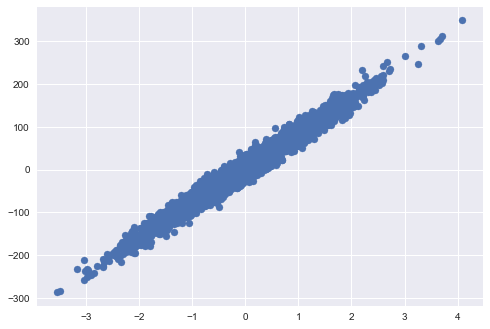

In [9]:
# visualise data

plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()

-0.03779466168006855 0.9920801322508517


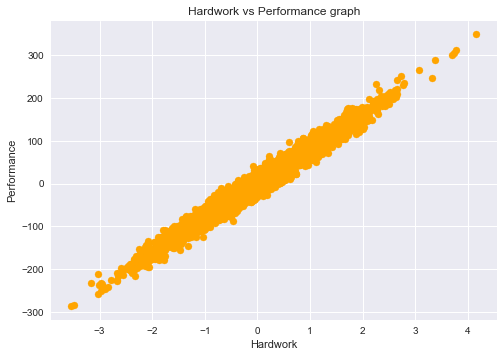

In [10]:
# convert X , Y into numpy arrays 

X = X.values
Y = Y.values

# normalisation

#we only normalise x values not y values , way to do it is - substract mean and divide by std deviation

u = X.mean()
std = X.std()
print(u,std) #std is close to 1 which means data is already normalised

X = (X-u)/std 

plt.style.use('seaborn')
plt.scatter(X,Y,color= 'orange')
plt.title("Hardwork vs Performance graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

## Linear Regression

In [13]:
# defining hypothesis function 

def hypothesis(x, theta):
    # theta = [theta0, theta1]
    y_ = theta[0] + theta[1]*x
    
    return y_ 

# defining gradient function

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2, )) # init gradient
    
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m                      # division by m will divide both grad[0] & grad[1]


# defining error function 

def error(X,Y,theta):
    
    m = X.shape[0]
    total_error = 0.0
    
    for i in range(m):
        
        y_ = hypothesis(X[i], theta)
        
        total_error += (y_ - Y[i])**2
        
    return total_error/m
                
                
# defining gradient descent function


def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):
    
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
   
    for i in range(max_steps):
        
        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]
        
        
        #Update theta
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta,error_list,theta_list

In [16]:

theta,error_list,theta_list = gradientDescent(X,Y)

In [17]:
theta

array([ 0.6838508 , 79.90361453])

In [18]:
error_list # must reduce

[6576.35005246196,
 5363.125102574931,
 4380.412893166487,
 3584.4160035456366,
 2939.658522952752,
 2417.404963672508,
 1994.3795806555281,
 1651.7290204117544,
 1374.1820666143055,
 1149.3690340383696,
 967.2704776518652,
 819.770646978796,
 700.2957841336078,
 603.5211452290067,
 525.1336877162773,
 461.6398471309694,
 410.20983625687,
 368.55152744884856,
 334.80829731435097,
 307.47628090540843,
 285.33734761416457,
 267.4048116482566,
 252.87945751587242,
 241.11392066864,
 231.5838358223823,
 223.86446709691373,
 217.61177842928484,
 212.54710060850397,
 208.4447115736724,
 205.1217764554589,
 202.43019900970543,
 200.25002127864602,
 198.48407731648712,
 197.05366270713802,
 195.8950268735658,
 194.95653184837263,
 194.19635087796493,
 193.58060429193594,
 193.08184955725244,
 192.67785822215873,
 192.35062524073192,
 192.08556652577707,
 191.87086896666273,
 191.69696394378104,
 191.55610087524585,
 191.4420017897342,
 191.34958153046787,
 191.2747211204641,
 191.2140841883591

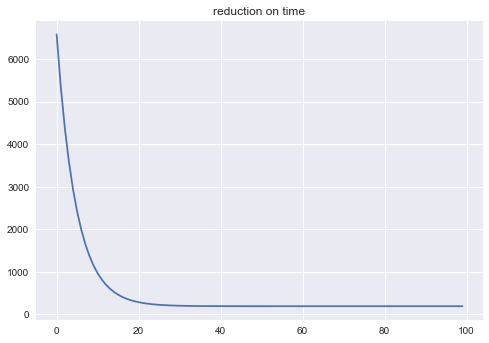

In [19]:
plt.plot(error_list)
plt.title("reduction on time")
plt.show()

## Predictions and Best line

In [20]:
y_ = hypothesis(X, theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


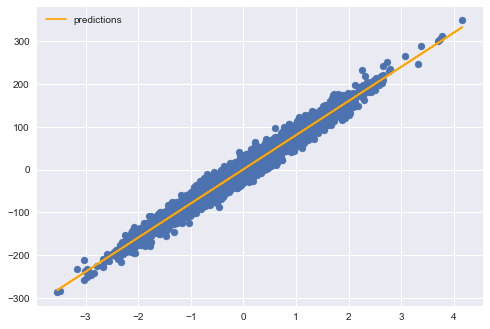

In [21]:
# Training  + Predictions

plt.scatter(X,Y)
plt.plot(X,y_,color = 'orange',label = 'predictions')
plt.legend()
plt.show()

# Testing

In [24]:


# Load the test data
X_test = pd.read_csv('./Test Cases/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

In [25]:

df = pd.DataFrame(data=y_test,columns=["y"])

In [26]:

df.to_csv('y_prediction.csv',index=False)